## Lead Scoring Case Study

### Step 1: Inspect Data

In [602]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [603]:
# Importing Pandas and NumPy
import pandas as pd, numpy as np

In [604]:
# Importing all datasets
pd.set_option('display.max_columns', None)
leads_data = pd.read_csv("Leads.csv")
leads_data.head(15)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.00,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.50,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
5,2058ef08-2858-443e-a01f-a9237db2f5ce,660680,API,Olark Chat,No,No,0,0.0,0,0.00,Olark Chat Conversation,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,NaN,01.High,02.Medium,17.0,15.0,No,No,Modified
6,9fae7df4-169d-489b-afe4-0f3d752542ed,660673,Landing Page Submission,Google,No,No,1,2.0,1640,2.00,Email Opened,India,Supply Chain Management,Online Search,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Low in Relevance,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,No,Modified
7,20ef72a2-fb3b-45e0-924e-551c5fa59095,660664,API,Olark Chat,No,No,0,0.0,0,0.00,Olark Chat Conversation,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
8,cfa0128c-a0da-4656-9d47-0aa4e67bf690,660624,Landing Page Submission,Direct Traffic,No,No,0,2.0,71,2.00,Email Opened,India,IT Projects Management,NaN,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,Thane & Outskirts,02.Medium,02.Medium,14.0,14.0,No,Yes,Email Opened
9,af465dfc-7204-4130-9e05-33231863c4b5,660616,API,Google,No,No,0,4.0,58,4.00,Email Opened,India,Finance Management,Word Of Mouth,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,Mumbai,02.Medium,02.Medium,13.0,16.0,No,No,Email Opened


In [605]:
# Dimensions of the dataframe
leads_data.shape

(9240, 37)

In [606]:
# Check statistical aspects of the dataframe
leads_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [607]:
# Checking type of the columns
leads_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

### Step 2: Handling missing values

In [608]:
# checking how many values are missing overall
leads_data.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [609]:
# checking % of the missing values
print((leads_data.isnull().sum() / len(leads_data)) * 100)

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [610]:
# There are lots of columns with large missing values, checking them further
# also Prospect ID is not needed
leads_data.drop(columns= 
                ['Lead Quality', 'Tags', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 
                 'Asymmetrique Activity Score','Asymmetrique Profile Score','Prospect ID'], 
                inplace=True)

print((leads_data.isnull().sum() / len(leads_data)) * 100)


Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.0000

In [611]:
# let's examin the rest of the columns with high null values

columns = ['Lead Profile','Country' , 'City','Specialization', 'How did you hear about X Education'
          ,'What is your current occupation', 'What matters most to you in choosing a course']
for col in columns:
    print("----{}----".format(col))
    print(leads_data[col].value_counts())
    print(leads_data[col].isnull().sum())
    print(leads_data[col].dtype)

----Lead Profile----
Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64
2709
object
----Country----
India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgiu

In [612]:
# There are a lot of values in many columns with 'Select' value, which means they don't actually hold useful values
# Calculate percentage for 'Select' and null values combined

def check_select_and_null (columns):
    total_rows = len(leads_data)

    for col in columns:
        select_percentage = (leads_data[col] == 'Select').sum() / total_rows * 100
        # Calculate percentage for 'null' values
        null_percentage = leads_data[col].isnull().sum() / total_rows * 100

        # Calculate combined percentage
        combined = (select_percentage + null_percentage)

        print(f"Total combined percentage for 'Select' and 'null' : {combined:.2f}%  in '{col}' ")

check_select_and_null(columns)

Total combined percentage for 'Select' and 'null' : 74.19%  in 'Lead Profile' 
Total combined percentage for 'Select' and 'null' : 26.63%  in 'Country' 
Total combined percentage for 'Select' and 'null' : 39.71%  in 'City' 
Total combined percentage for 'Select' and 'null' : 36.58%  in 'Specialization' 
Total combined percentage for 'Select' and 'null' : 78.46%  in 'How did you hear about X Education' 
Total combined percentage for 'Select' and 'null' : 29.11%  in 'What is your current occupation' 
Total combined percentage for 'Select' and 'null' : 29.32%  in 'What matters most to you in choosing a course' 


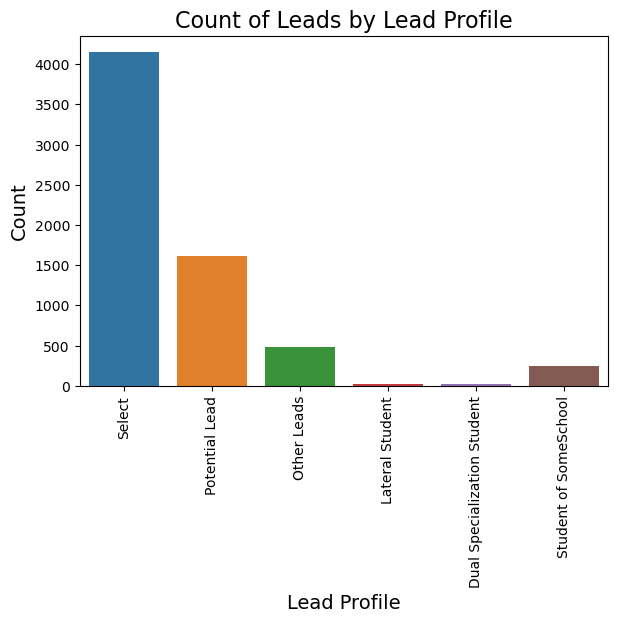

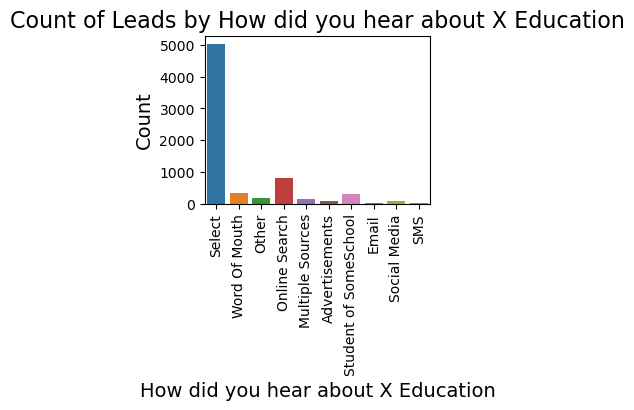

In [613]:
plt.figure(figsize=(15,10))

def plot_countplot(column, col_number):
    # Set the figure size
    plt.subplot(2,2, 1)

    # Create countplot
    sns.countplot(data=leads_data, x=column)
    plt.title('Count of Leads by {}'.format(column), size=16)
    plt.xlabel(column, size=14)
    plt.ylabel('Count', size=14)
    plt.xticks(rotation = 90)
    
    # Show the plot
    plt.show()


plot_countplot('Lead Profile', 1)
plot_countplot('How did you hear about X Education', 2)
    

In [614]:
# clearly 'Lead Profile' and 'How did you hear about X Education' values are very high, 
# dropping these columns 

def drop_columns(colname):
    leads_data.drop([colname], axis = 1, inplace = True)
    columns.remove(colname)
    
drop_columns('Lead Profile')
drop_columns('How did you hear about X Education')


#Checking again
check_select_and_null(columns)

Total combined percentage for 'Select' and 'null' : 26.63%  in 'Country' 
Total combined percentage for 'Select' and 'null' : 39.71%  in 'City' 
Total combined percentage for 'Select' and 'null' : 36.58%  in 'Specialization' 
Total combined percentage for 'Select' and 'null' : 29.11%  in 'What is your current occupation' 
Total combined percentage for 'Select' and 'null' : 29.32%  in 'What matters most to you in choosing a course' 


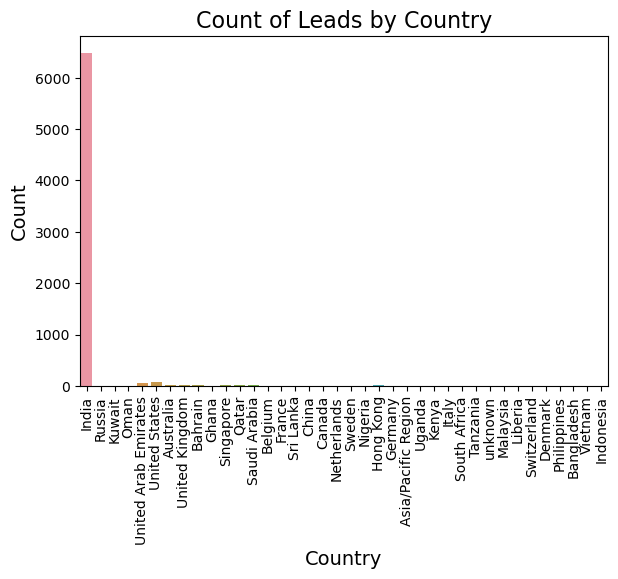

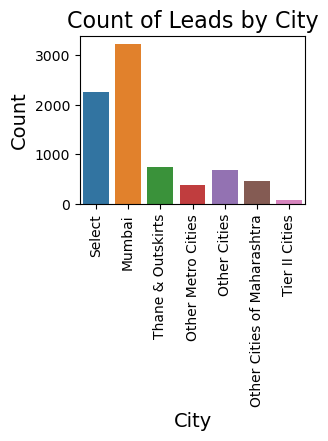

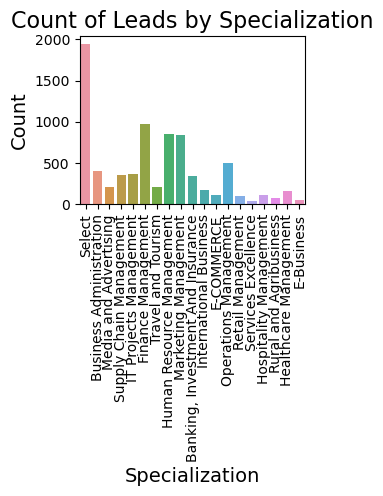

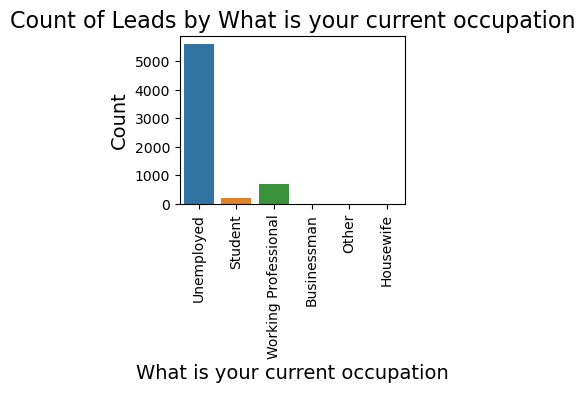

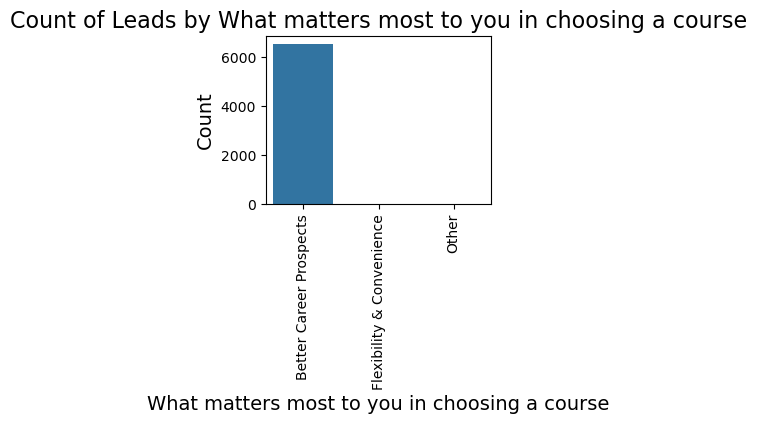

In [615]:
import matplotlib.pyplot as plt
import seaborn as sns

# let's dig in more into remaining columns through visualization
plt.figure(figsize=(15,10))


# Loop through the columns 
for i in range(1, len(columns) + 1):
    plot_countplot(columns[i - 1], i)

In [616]:
# Loooking at the above results, some columns are dominated by only one value  or in combination with 'select'
# We won't be able to get enough insights from them so dropping Country, What matters most to you in choosing a course

drop_columns('Country')
drop_columns('What matters most to you in choosing a course')
drop_columns('Specialization')
# value of city are not useful, it says other metro cities and other cities of maharastra etc
drop_columns('City')



In [617]:
print((leads_data.isnull().sum() / len(leads_data)) * 100)

Lead Number                                  0.000000
Lead Origin                                  0.000000
Lead Source                                  0.389610
Do Not Email                                 0.000000
Do Not Call                                  0.000000
Converted                                    0.000000
TotalVisits                                  1.482684
Total Time Spent on Website                  0.000000
Page Views Per Visit                         1.482684
Last Activity                                1.114719
What is your current occupation             29.112554
Search                                       0.000000
Magazine                                     0.000000
Newspaper Article                            0.000000
X Education Forums                           0.000000
Newspaper                                    0.000000
Digital Advertisement                        0.000000
Through Recommendations                      0.000000
Receive More Updates About O

In [618]:
# dropping rows with having small % of null values
leads_data = leads_data.dropna(subset=['Lead Source'])
leads_data = leads_data.dropna(subset=['TotalVisits'])
leads_data = leads_data.dropna(subset=['Page Views Per Visit'])
leads_data = leads_data.dropna(subset=['Last Activity'])

print((leads_data.isnull().sum() / len(leads_data)) * 100)

Lead Number                                  0.000000
Lead Origin                                  0.000000
Lead Source                                  0.000000
Do Not Email                                 0.000000
Do Not Call                                  0.000000
Converted                                    0.000000
TotalVisits                                  0.000000
Total Time Spent on Website                  0.000000
Page Views Per Visit                         0.000000
Last Activity                                0.000000
What is your current occupation             29.567996
Search                                       0.000000
Magazine                                     0.000000
Newspaper Article                            0.000000
X Education Forums                           0.000000
Newspaper                                    0.000000
Digital Advertisement                        0.000000
Through Recommendations                      0.000000
Receive More Updates About O

In [619]:
# not deleting occupation for now, rest of the data look fine

### Step 3: Data Preparation

In [620]:
# Mapping Yes/No values to 1 and 0

variable_list =  ['Do Not Email', 'Do Not Call','Search','Magazine','Newspaper Article','X Education Forums'
    ,'Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses'
    ,'Update me on Supply Chain Content','Get updates on DM Content'
    ,'I agree to pay the amount through cheque','A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
leads_data[variable_list] = leads_data[variable_list].apply(binary_map)

leads_data.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Unemployed,0,0,0,0,0,0,0,0,0,0,0,0,Modified
1,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Unemployed,0,0,0,0,0,0,0,0,0,0,0,0,Email Opened
2,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Student,0,0,0,0,0,0,0,0,0,0,0,1,Email Opened
3,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Unemployed,0,0,0,0,0,0,0,0,0,0,0,0,Modified
4,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Unemployed,0,0,0,0,0,0,0,0,0,0,0,0,Modified


In [621]:
# create dummy features for categorical variables with multiple levels, check values first
print(leads_data['Lead Origin'].unique())
print(leads_data['Lead Source'].unique())
print(leads_data['Last Activity'].unique())
print(leads_data['What is your current occupation'].unique())
print(leads_data['Last Notable Activity'].unique())

['API' 'Landing Page Submission' 'Lead Add Form' 'Lead Import']
['Olark Chat' 'Organic Search' 'Direct Traffic' 'Google' 'Referral Sites'
 'Reference' 'google' 'Welingak Website' 'Facebook' 'blog'
 'Pay per Click Ads' 'bing' 'Social Media' 'WeLearn' 'Click2call'
 'Live Chat' 'welearnblog_Home' 'youtubechannel' 'testone' 'Press_Release'
 'NC_EDM']
['Page Visited on Website' 'Email Opened' 'Unreachable'
 'Converted to Lead' 'Olark Chat Conversation' 'Email Bounced'
 'Email Link Clicked' 'Form Submitted on Website' 'Unsubscribed'
 'Had a Phone Conversation' 'View in browser link Clicked' 'SMS Sent'
 'Visited Booth in Tradeshow' 'Approached upfront'
 'Resubscribed to emails' 'Email Received' 'Email Marked Spam']
['Unemployed' 'Student' nan 'Working Professional' 'Businessman' 'Other'
 'Housewife']
['Modified' 'Email Opened' 'Page Visited on Website' 'Email Bounced'
 'Email Link Clicked' 'Unreachable' 'Unsubscribed'
 'Had a Phone Conversation' 'Olark Chat Conversation' 'SMS Sent'
 'Approach

In [622]:

# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy_col_names = ['Lead Origin','Lead Source','Last Activity',
                   'What is your current occupation','Last Notable Activity']

dummy1 = pd.get_dummies(leads_data [dummy_col_names], drop_first=True)

# Adding the results back to the orig dataframe
leads_data = pd.concat([leads_data, dummy1], axis=1)

In [623]:
leads_data.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Unemployed,0,0,0,0,0,0,0,0,0,0,0,0,Modified,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Unemployed,0,0,0,0,0,0,0,0,0,0,0,0,Email Opened,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Student,0,0,0,0,0,0,0,0,0,0,0,1,Email Opened,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Unemployed,0,0,0,0,0,0,0,0,0,0,0,0,Modified,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Unemployed,0,0,0,0,0,0,0,0,0,0,0,0,Modified,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [624]:
# dropping the origional columns after dummy are created

leads_data.drop(columns= dummy_col_names, inplace=True)

In [625]:
leads_data.head()

,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,660737,0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,660728,0,0,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,660727,0,0,1,2.0,1532,2.0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,660719,0,0,0,1.0,305,1.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,660681,0,0,1,2.0,1428,1.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


#### Checking for Outliers

In [626]:
# Checking for outliers in the continuous variables
num_leads = leads_data[['Total Time Spent on Website','TotalVisits','Page Views Per Visit']]

In [627]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
num_leads.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,Total Time Spent on Website,TotalVisits,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000
mean,482.887481,3.456028,2.370151
std,545.256560,4.858802,2.160871
min,0.000000,0.000000,0.000000
25%,11.000000,1.000000,1.000000
50%,246.000000,3.000000,2.000000
75%,922.750000,5.000000,3.200000
90%,1373.000000,7.000000,5.000000
95%,1557.000000,10.000000,6.000000
99%,1839.000000,17.000000,9.000000


<Axes: >

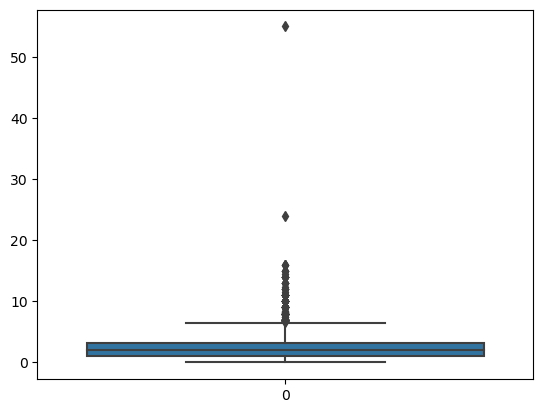

In [628]:
# there seem to be some outliers in the above data, let's check it though visualization

sns.boxplot(leads_data['Page Views Per Visit'])


707772
78


<Axes: >

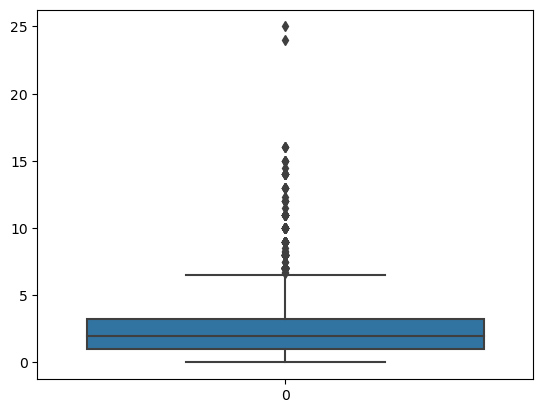

In [629]:
print(leads_data.size)
rows_greater_than_25 = leads_data[leads_data['Page Views Per Visit'] > 25]
print(rows_greater_than_25.size)

leads_data['Page Views Per Visit'] = leads_data['Page Views Per Visit'].apply(lambda x: min(x, 25))
sns.boxplot(leads_data['Page Views Per Visit'])

<Axes: >

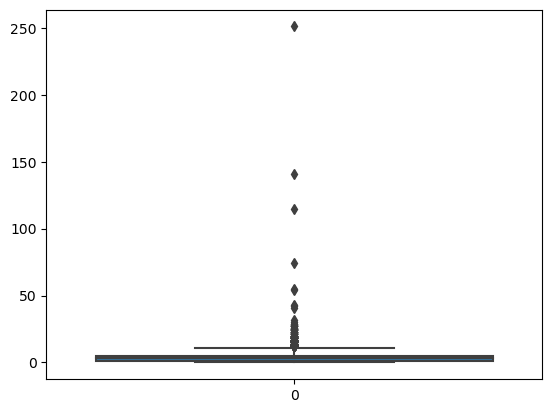

In [630]:
sns.boxplot(leads_data['TotalVisits'])

707772
234


<Axes: >

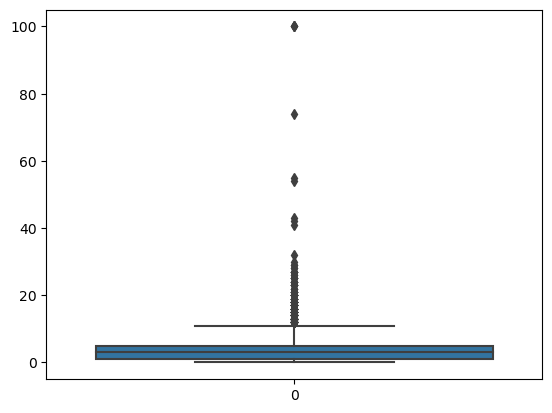

In [631]:
print(leads_data.size)
rows_greater_than_100 = leads_data[leads_data['TotalVisits'] > 100]
print(rows_greater_than_100.size)

leads_data['TotalVisits'] = leads_data['TotalVisits'].apply(lambda x: min(x, 100))
sns.boxplot(leads_data['TotalVisits'])

### Step 4: Test-Train Split

In [632]:
from sklearn.model_selection import train_test_split

In [633]:
# Putting feature variable to X
X = leads_data.drop(['Converted'], axis=1)
X.head()

,Lead Number,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,660737,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,660728,0,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,660727,0,0,2.0,1532,2.0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,660719,0,0,1.0,305,1.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,660681,0,0,2.0,1428,1.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [634]:
# Putting response variable to y
y = leads_data['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [635]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Step 5: Feature Scaling

In [636]:
from sklearn.preprocessing import StandardScaler

In [637]:
scaler = StandardScaler()

X_train[['Total Time Spent on Website','TotalVisits','Page Views Per Visit']] = scaler.fit_transform(X_train[['Total Time Spent on Website','TotalVisits','Page Views Per Visit']])

X_train.head()

,Lead Number,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,630949,0,0,-0.353683,-0.160255,-0.179666,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1012,649355,1,0,-0.353683,-0.540048,-0.179666,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9226,579735,0,0,-0.845255,-0.888650,-1.132538,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4750,614238,0,0,-0.353683,1.643304,-0.179666,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
7987,588625,0,0,0.383676,2.017593,0.058552,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [638]:
### Checking the Conversion Rate
conversion = (sum(leads_data['Converted'])/len(leads_data['Converted'].index))*100
conversion

37.85541106458012

In [639]:
# our Convertion ratio is ~38%

### Step 6: Looking at Correlations

In [640]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

78


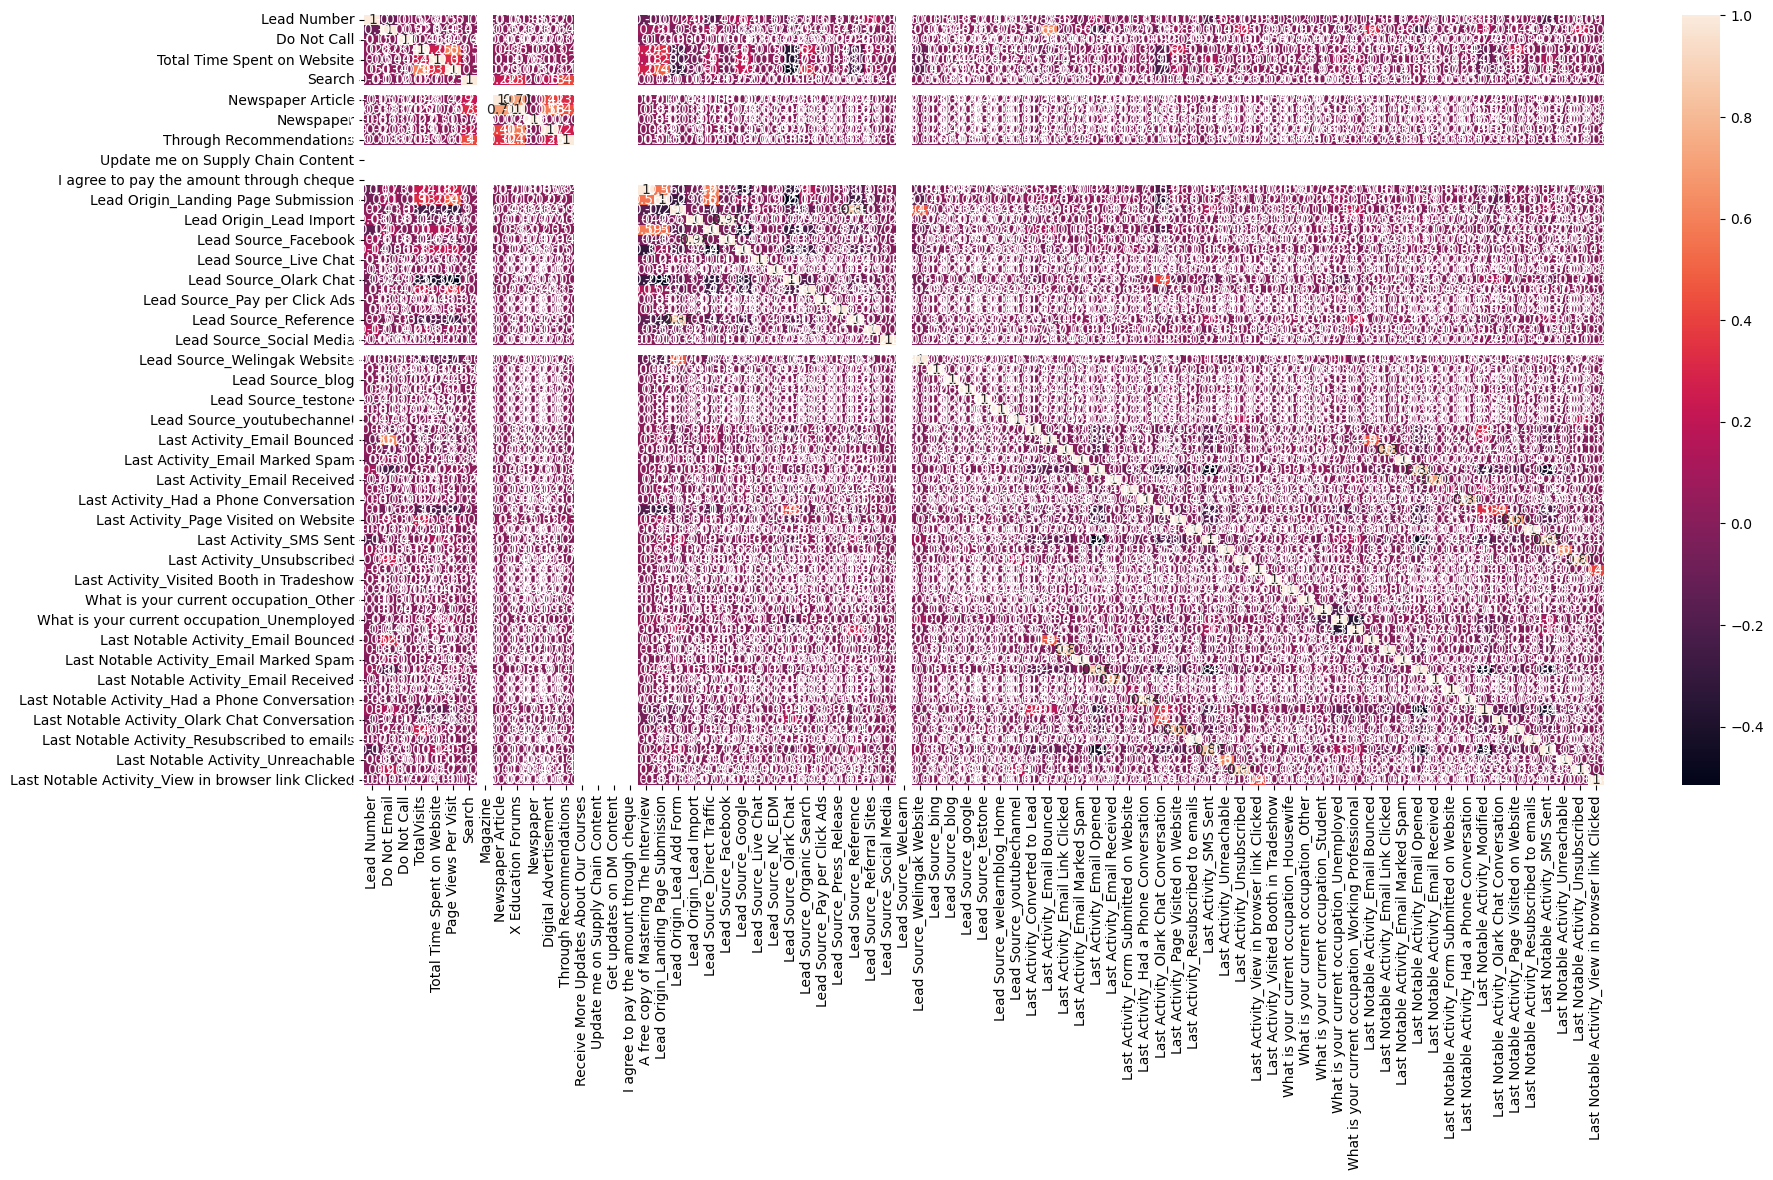

In [641]:
# Let's see the correlation matrix 
print(leads_data.columns.size)
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(X_train.corr(),annot = True)
plt.show()

In [ ]:
# due to large number of columns, it is difficult to visualize co-relation
# we need to use RFE from the start here

### Step 7: Feature Selection Using RFE

In [643]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [644]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select =15)             
rfe = rfe.fit(X_train, y_train)


In [645]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Lead Number', True, 1),
 ('Do Not Email', True, 1),
 ('Do Not Call', False, 30),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 9),
 ('Search', False, 57),
 ('Magazine', False, 61),
 ('Newspaper Article', False, 54),
 ('X Education Forums', False, 43),
 ('Newspaper', False, 47),
 ('Digital Advertisement', False, 55),
 ('Through Recommendations', False, 34),
 ('Receive More Updates About Our Courses', False, 60),
 ('Update me on Supply Chain Content', False, 59),
 ('Get updates on DM Content', False, 58),
 ('I agree to pay the amount through cheque', False, 62),
 ('A free copy of Mastering The Interview', False, 5),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 52),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Facebook', False, 36),
 ('Lead Source_Google', False, 8),
 ('Lead Source_Live Chat', False, 29),
 ('Lead Source_NC_EDM', False, 

In [646]:
col = X_train.columns[rfe.support_]
col

Index(['Lead Number', 'Do Not Email', 'TotalVisits',
       'Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Source_Direct Traffic',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Modified', 'Last Notable Activity_SMS Sent'],
      dtype='object')

In [647]:
least_imp_col_names=X_train.columns[~rfe.support_]
least_imp_col_names

Index(['Do Not Call', 'Page Views Per Visit', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Lead Origin_Lead Import',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Live Chat',
       'Lead Source_NC_EDM', 'Lead Source_Organic Search',
       'Lead Source_Pay per Click Ads', 'Lead Source_Press_Release',
       'Lead Source_Referral Sites', 'Lead Source_Social Media',
       'Lead Source_WeLearn', 'Lead Source_Welingak Website',
       'Lead Source_bing', 'Lead Source_blog', 'Lead Source_google',
       'Lead Source_testone', 'Lead Source_welearnblog_Home',
       'Lead Source_youtubechannel', 'Last Activity_Converted to Lead',
       'Last Activity_Ema

In [ ]:
# checking co-relation for RFE selected 15 columns
plt.figure(figsize = (20,10))        
sns.heatmap(X_train[col].corr(),annot = True)
plt.show()

In [649]:
# there are many highly corelational columns, some examples
# 1) Lead Source_Olark Chat and Lead Origin_Landing Page Submission: -51% . This means they are inversely corelated so if one them goes up, another would go down
# 2)Last Notable Activity_Modified' and Last Notable Activity_SMS Sent also has high value
# We will use VIF to identify and reduce these corelation

# looking at only 15 columns that will be used for further analysis
X_train = X_train[col]
X_train

### Step 8: Building model

In [650]:
import statsmodels.api as sm
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2557.1
Date:                Tue, 16 Jan 2024   Deviance:                       5114.2
Time:                        18:50:05   Pearson chi2:                 6.20e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4101
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -7.1175      1.002     -7.103      0.000      -9.082      -5.153
Lead Number                                           8.636e-06   1.59e-06      5.438      0.000    5.52e-06    1.17e-05
Do Not Email                                            -1.4814      0.177     -8.387      0.000      -1.828      -1.135
TotalVisits                                              0.1256      0.034      3.675      0.000       0.059       0.193
Total Time Spent on Website                              1.1283      0.041     27.559      0.000       1.048       1.209
Lead Origin_Landing Page Submission                     -0.2316      0.097     -2.391      0.017      -0.421      -0.042
Lead Origin_Lead Add Form                                4.8102      0.527      9.128      0.000       3.777       5.843
Lead Source_Direct Traffic                              -0.2070      0.091     -2.280      0.023      -0.385      -0.029
Lead Source_Olark Chat                                   1.3127      0.128     10.246      0.000       1.062       1.564
Lead Source_Reference                                   -1.1079      0.563     -1.969      0.049      -2.211      -0.005
Last Activity_Olark Chat Conversation                   -1.0524      0.173     -6.092      0.000      -1.391      -0.714
Last Activity_SMS Sent                                   0.8422      0.159      5.303      0.000       0.531       1.154
What is your current occupation_Unemployed               1.0331      0.084     12.354      0.000       0.869       1.197
What is your current occupation_Working Professional     3.5347      0.199     17.724      0.000       3.144       3.926
Last Notable Activity_Modified                          -0.6953      0.097     -7.143      0.000      -0.886      -0.505
Last Notable Activity_SMS Sent                           0.5557      0.181      3.075      0.002       0.202       0.910
========================================================================================================================
"""

##### Assessing the model with StatsModels

In [651]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2557.1
Date:                Tue, 16 Jan 2024   Deviance:                       5114.2
Time:                        18:50:05   Pearson chi2:                 6.20e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4101
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -7.1175      1.002     -7.103      0.000      -9.082      -5.153
Lead Number                                           8.636e-06   1.59e-06      5.438      0.000    5.52e-06    1.17e-05
Do Not Email                                            -1.4814      0.177     -8.387      0.000      -1.828      -1.135
TotalVisits                                              0.1256      0.034      3.675      0.000       0.059       0.193
Total Time Spent on Website                              1.1283      0.041     27.559      0.000       1.048       1.209
Lead Origin_Landing Page Submission                     -0.2316      0.097     -2.391      0.017      -0.421      -0.042
Lead Origin_Lead Add Form                                4.8102      0.527      9.128      0.000       3.777       5.843
Lead Source_Direct Traffic                              -0.2070      0.091     -2.280      0.023      -0.385      -0.029
Lead Source_Olark Chat                                   1.3127      0.128     10.246      0.000       1.062       1.564
Lead Source_Reference                                   -1.1079      0.563     -1.969      0.049      -2.211      -0.005
Last Activity_Olark Chat Conversation                   -1.0524      0.173     -6.092      0.000      -1.391      -0.714
Last Activity_SMS Sent                                   0.8422      0.159      5.303      0.000       0.531       1.154
What is your current occupation_Unemployed               1.0331      0.084     12.354      0.000       0.869       1.197
What is your current occupation_Working Professional     3.5347      0.199     17.724      0.000       3.144       3.926
Last Notable Activity_Modified                          -0.6953      0.097     -7.143      0.000      -0.886      -0.505
Last Notable Activity_SMS Sent                           0.5557      0.181      3.075      0.002       0.202       0.910
========================================================================================================================
"""

In [652]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.088480
1012    0.366185
9226    0.325884
4750    0.722365
7987    0.737292
1281    0.847609
2880    0.052224
4971    0.945782
7536    0.849161
1248    0.779124
dtype: float64

In [653]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.08847982, 0.36618518, 0.32588352, 0.72236516, 0.73729234,
       0.84760878, 0.05222431, 0.9457815 , 0.84916124, 0.77912442])

##### Creating a dataframe with the actual conversion flag and the predicted probabilities

In [654]:
y_train_pred_final = pd.DataFrame({'Conversion':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['ID'] = y_train.index
y_train_pred_final.head()

,Conversion,Conversion_Prob,ID
0,0,0.088480,3009
1,0,0.366185,1012
2,0,0.325884,9226
3,1,0.722365,4750
4,1,0.737292,7987


##### Creating new column 'predicted' with 1 if probability is > 0.5 else 0

In [655]:
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Conversion,Conversion_Prob,ID,predicted
0,0,0.088480,3009,0
1,0,0.366185,1012,0
2,0,0.325884,9226,0
3,1,0.722365,4750,1
4,1,0.737292,7987,1


In [656]:
from sklearn import metrics

In [657]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Conversion, y_train_pred_final.predicted )
print(confusion)

[[3475  430]
 [ 745 1701]]


In [658]:
# Predicted     not_converted    converted
# Actual
# not_converted        3270      365
# converted            579       708  

In [659]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Conversion, y_train_pred_final.predicted))

0.814989765391277


In [660]:
# accuracy is 81% here

#### Checking VIFs

In [661]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [662]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Lead Number,8.63
14,Last Notable Activity_SMS Sent,6.58
10,Last Activity_SMS Sent,6.27
5,Lead Origin_Lead Add Form,4.60
4,Lead Origin_Landing Page Submission,4.33
8,Lead Source_Reference,4.15
11,What is your current occupation_Unemployed,3.21
13,Last Notable Activity_Modified,2.51
7,Lead Source_Olark Chat,2.45
6,Lead Source_Direct Traffic,1.93


In [663]:
# There are a few variables with high VIF. 
# dropping one at a time, starting with the Lead Number

In [664]:
col = col.drop('Lead Number', 1)
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Direct Traffic', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Last Activity_Olark Chat Conversation',
       'Last Activity_SMS Sent', 'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Modified', 'Last Notable Activity_SMS Sent'],
      dtype='object')

In [665]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2572.0
Date:                Tue, 16 Jan 2024   Deviance:                       5144.1
Time:                        18:50:11   Pearson chi2:                 6.25e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4073
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.7118      0.107    -16.014      0.000      -1.921      -1.502
Do Not Email                                            -1.5249      0.176     -8.682      0.000      -1.869      -1.181
TotalVisits                                              0.1239      0.034      3.615      0.000       0.057       0.191
Total Time Spent on Website                              1.1228      0.041     27.534      0.000       1.043       1.203
Lead Origin_Landing Page Submission                     -0.2603      0.097     -2.692      0.007      -0.450      -0.071
Lead Origin_Lead Add Form                                4.7800      0.528      9.056      0.000       3.745       5.815
Lead Source_Direct Traffic                              -0.2642      0.090     -2.936      0.003      -0.441      -0.088
Lead Source_Olark Chat                                   1.2231      0.126      9.669      0.000       0.975       1.471
Lead Source_Reference                                   -1.1050      0.563     -1.962      0.050      -2.209      -0.001
Last Activity_Olark Chat Conversation                   -1.0658      0.172     -6.198      0.000      -1.403      -0.729
Last Activity_SMS Sent                                   0.8273      0.158      5.227      0.000       0.517       1.137
What is your current occupation_Unemployed               1.0291      0.084     12.309      0.000       0.865       1.193
What is your current occupation_Working Professional     3.5064      0.199     17.663      0.000       3.117       3.895
Last Notable Activity_Modified                          -0.6656      0.097     -6.874      0.000      -0.855      -0.476
Last Notable Activity_SMS Sent                           0.4752      0.180      2.647      0.008       0.123       0.827
========================================================================================================================
"""

In [666]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [667]:
y_train_pred[:10]

array([0.07870189, 0.28801099, 0.4011953 , 0.70420979, 0.78027575,
       0.80310741, 0.04856598, 0.94613225, 0.87183076, 0.73040615])

In [668]:
y_train_pred_final['Conversion_Prob'] = y_train_pred

In [669]:
# Creating new column 'predicted' with 1 if Conversion_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Conversion,Conversion_Prob,ID,predicted
0,0,0.078702,3009,0
1,0,0.288011,1012,0
2,0,0.401195,9226,0
3,1,0.704210,4750,1
4,1,0.780276,7987,1


In [670]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Conversion, y_train_pred_final.predicted))

0.8157770429853566


In [671]:
# overall the accuracy is still similar to the origional ~81%

##### Let's check the VIFs again

In [672]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,Last Notable Activity_SMS Sent,6.53
9,Last Activity_SMS Sent,6.26
4,Lead Origin_Lead Add Form,4.47
7,Lead Source_Reference,4.15
3,Lead Origin_Landing Page Submission,3.13
10,What is your current occupation_Unemployed,2.38
12,Last Notable Activity_Modified,2.23
5,Lead Source_Direct Traffic,1.93
6,Lead Source_Olark Chat,1.85
8,Last Activity_Olark Chat Conversation,1.61


In [673]:
# Let's drop Last Notable Activity_SMS Sent it has a high VIF
col = col.drop('Last Notable Activity_SMS Sent')
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Direct Traffic', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Last Activity_Olark Chat Conversation',
       'Last Activity_SMS Sent', 'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Modified'],
      dtype='object')

In [674]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2575.6
Date:                Tue, 16 Jan 2024   Deviance:                       5151.1
Time:                        18:50:14   Pearson chi2:                 6.27e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4067
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.6923      0.107    -15.883      0.000      -1.901      -1.483
Do Not Email                                            -1.5163      0.176     -8.623      0.000      -1.861      -1.172
TotalVisits                                              0.1189      0.034      3.475      0.001       0.052       0.186
Total Time Spent on Website                              1.1235      0.041     27.564      0.000       1.044       1.203
Lead Origin_Landing Page Submission                     -0.2556      0.097     -2.648      0.008      -0.445      -0.066
Lead Origin_Lead Add Form                                4.7448      0.527      9.006      0.000       3.712       5.777
Lead Source_Direct Traffic                              -0.2630      0.090     -2.927      0.003      -0.439      -0.087
Lead Source_Olark Chat                                   1.2206      0.126      9.658      0.000       0.973       1.468
Lead Source_Reference                                   -1.0822      0.563     -1.924      0.054      -2.185       0.020
Last Activity_Olark Chat Conversation                   -0.9983      0.170     -5.856      0.000      -1.332      -0.664
Last Activity_SMS Sent                                   1.1946      0.075     15.829      0.000       1.047       1.343
What is your current occupation_Unemployed               1.0528      0.083     12.678      0.000       0.890       1.216
What is your current occupation_Working Professional     3.5326      0.199     17.786      0.000       3.143       3.922
Last Notable Activity_Modified                          -0.8069      0.082     -9.871      0.000      -0.967      -0.647
========================================================================================================================
"""

In [675]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [676]:
y_train_pred[:10]

array([0.08069169, 0.3008195 , 0.46752866, 0.68740185, 0.82376577,
       0.79345652, 0.04969198, 0.94257959, 0.87723881, 0.78161009])

In [677]:
y_train_pred_final['Conversion_Prob'] = y_train_pred

In [678]:
# Creating new column 'predicted' with 1 if Conversion_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Conversion,Conversion_Prob,ID,predicted
0,0,0.080692,3009,0
1,0,0.300819,1012,0
2,0,0.467529,9226,0
3,1,0.687402,4750,1
4,1,0.823766,7987,1


In [679]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Conversion, y_train_pred_final.predicted))

0.8159344985041725


In [680]:
# The accuracy is still the same.

##### Let's now check the VIFs again

In [681]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Lead Origin_Lead Add Form,4.47
7,Lead Source_Reference,4.15
3,Lead Origin_Landing Page Submission,3.12
10,What is your current occupation_Unemployed,2.30
5,Lead Source_Direct Traffic,1.93
6,Lead Source_Olark Chat,1.84
12,Last Notable Activity_Modified,1.68
8,Last Activity_Olark Chat Conversation,1.56
9,Last Activity_SMS Sent,1.55
2,Total Time Spent on Website,1.31


In [682]:
# We are good with the VIF

In [683]:
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2575.6
Date:                Tue, 16 Jan 2024   Deviance:                       5151.1
Time:                        18:50:20   Pearson chi2:                 6.27e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4067
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.6923      0.107    -15.883      0.000      -1.901      -1.483
Do Not Email                                            -1.5163      0.176     -8.623      0.000      -1.861      -1.172
TotalVisits                                              0.1189      0.034      3.475      0.001       0.052       0.186
Total Time Spent on Website                              1.1235      0.041     27.564      0.000       1.044       1.203
Lead Origin_Landing Page Submission                     -0.2556      0.097     -2.648      0.008      -0.445      -0.066
Lead Origin_Lead Add Form                                4.7448      0.527      9.006      0.000       3.712       5.777
Lead Source_Direct Traffic                              -0.2630      0.090     -2.927      0.003      -0.439      -0.087
Lead Source_Olark Chat                                   1.2206      0.126      9.658      0.000       0.973       1.468
Lead Source_Reference                                   -1.0822      0.563     -1.924      0.054      -2.185       0.020
Last Activity_Olark Chat Conversation                   -0.9983      0.170     -5.856      0.000      -1.332      -0.664
Last Activity_SMS Sent                                   1.1946      0.075     15.829      0.000       1.047       1.343
What is your current occupation_Unemployed               1.0528      0.083     12.678      0.000       0.890       1.216
What is your current occupation_Working Professional     3.5326      0.199     17.786      0.000       3.143       3.922
Last Notable Activity_Modified                          -0.8069      0.082     -9.871      0.000      -0.967      -0.647
========================================================================================================================
"""

In [684]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_train_pred_final.Conversion, y_train_pred_final.predicted )
confusion

array([[3475,  430],
       [ 739, 1707]])

In [685]:
# Actual/Predicted     not_converted    converted
        # not_converted        3269      366
        # converted            595       692  

In [686]:
# overall accuracy.
metrics.accuracy_score(y_train_pred_final.Conversion, y_train_pred_final.predicted)

0.8159344985041725

In [687]:
# as per the direction from CEO, expectation is to achieve 80% accuracy.
# from the above model, it seems we are good to go ahead

## Metrics beyond simply accuracy

In [688]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [689]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6978740801308259

In [690]:
# Let us calculate specificity
TN / float(TN+FP)

0.8898847631241997

In [691]:
# Calculate false postive rate - predicting conversion when customer is not converted
print(FP/ float(TN+FP))

0.11011523687580026


In [692]:
# positive predictive value 
print (TP / float(TP+FP))

0.7987833411324287


In [693]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8246321784527765


### Step 9: Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.

In [694]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [695]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Conversion, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

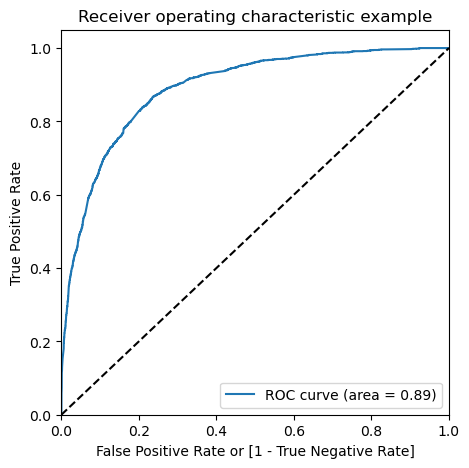

In [696]:
draw_roc(y_train_pred_final.Conversion, y_train_pred_final.Conversion_Prob)

### Step 10: Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [697]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Conversion,Conversion_Prob,ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.080692,3009,0,1,0,0,0,0,0,0,0,0,0
1,0,0.300819,1012,0,1,1,1,1,0,0,0,0,0,0
2,0,0.467529,9226,0,1,1,1,1,1,0,0,0,0,0
3,1,0.687402,4750,1,1,1,1,1,1,1,1,0,0,0
4,1,0.823766,7987,1,1,1,1,1,1,1,1,1,1,0


In [698]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Conversion, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.637537  0.970973  0.428681
0.2   0.2  0.761612  0.917825  0.663764
0.3   0.3  0.803338  0.865904  0.764149
0.4   0.4  0.816249  0.782911  0.837132
0.5   0.5  0.815934  0.697874  0.889885
0.6   0.6  0.806645  0.627964  0.918566
0.7   0.7  0.781137  0.518806  0.945455
0.8   0.8  0.759093  0.426002  0.967734
0.9   0.9  0.714848  0.282093  0.985915


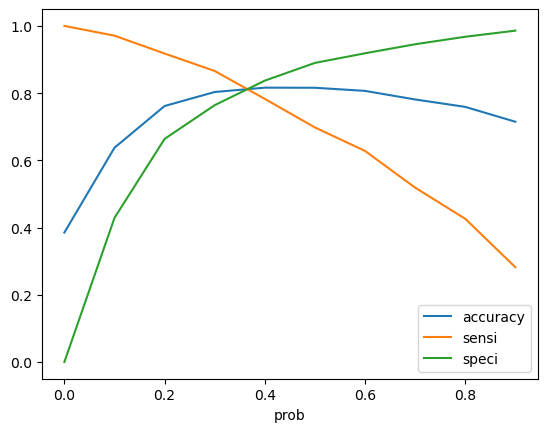

In [699]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [700]:
# From the curve above, 0.4 is the optimum point to take it as a cutoff probability.

In [701]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.4 else 0)

y_train_pred_final.head()

,Conversion,Conversion_Prob,ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.080692,3009,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.300819,1012,0,1,1,1,1,0,0,0,0,0,0,0
2,0,0.467529,9226,0,1,1,1,1,1,0,0,0,0,0,1
3,1,0.687402,4750,1,1,1,1,1,1,1,1,0,0,0,1
4,1,0.823766,7987,1,1,1,1,1,1,1,1,1,1,0,1


In [702]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Conversion, y_train_pred_final.final_predicted)

0.8162494095418045

In [703]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Conversion, y_train_pred_final.final_predicted )
confusion2

array([[3269,  636],
       [ 531, 1915]])

In [704]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [705]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7829108748977923

In [706]:
# Let us calculate specificity
TN / float(TN+FP)

0.8371318822023047

In [707]:
# Calculate false postive rate - predicting conversion when customer is not converted
print(FP/ float(TN+FP))

0.16286811779769525


In [708]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7506860054880439


In [709]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8602631578947368


## Precision and Recall

In [710]:
#Looking at the confusion matrix again

In [711]:
confusion = metrics.confusion_matrix(y_train_pred_final.Conversion, y_train_pred_final.predicted )
confusion

array([[3475,  430],
       [ 739, 1707]])

##### Precision
TP / TP + FP

In [712]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7987833411324287

##### Recall
TP / TP + FN

In [713]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.6978740801308259

In [714]:
# as per the direction from CEO, expectation is to achieve 80% accuracy and precision.
# so we are good with the model now
# let's do predictions

### Step 11: Making predictions on the test set

In [715]:
X_test[['Total Time Spent on Website','TotalVisits','Page Views Per Visit']] = scaler.transform(X_test[['Total Time Spent on Website','TotalVisits','Page Views Per Visit']])

In [716]:
X_test = X_test[col]
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Olark Chat,Lead Source_Reference,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Modified
3271,0,0.137890,-0.600595,0,0,0,0,0,0,0,0,0,0
1490,0,0.383676,1.887326,1,0,1,0,0,0,0,0,1,0
7936,0,-0.353683,-0.752879,0,0,0,0,0,0,0,0,0,0
4216,0,-0.845255,-0.888650,0,1,0,0,1,0,0,0,0,1
3830,0,1.121034,-0.587751,1,0,0,0,0,0,0,0,0,0


In [717]:
X_test_sm = sm.add_constant(X_test)

Making predictions on the test set

In [718]:
y_test_pred = res.predict(X_test_sm)

In [719]:
y_test_pred[:10]

3271    0.087011
1490    0.970338
7936    0.070423
4216    0.516131
3830    0.077628
1800    0.693751
6507    0.390355
4821    0.311593
4223    0.957666
4714    0.234535
dtype: float64

In [720]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [721]:
# Let's see the head
y_pred_1.head()

,0
3271,0.087011
1490,0.970338
7936,0.070423
4216,0.516131
3830,0.077628


In [722]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [723]:
# Putting ID to index
y_test_df['ID'] = y_test_df.index

In [724]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [725]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [726]:
y_pred_final.head()

,Converted,ID,0
0,0,3271,0.087011
1,1,1490,0.970338
2,0,7936,0.070423
3,1,4216,0.516131
4,0,3830,0.077628


In [727]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Conversion_Prob'})

In [728]:
y_pred_final.columns

Index(['Converted', 'ID', 'Conversion_Prob'], dtype='object')

In [729]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['ID', 'Converted', 'Conversion_Prob'], axis=1)

In [730]:
# Let's see the head of y_pred_final
y_pred_final.head()

,ID,Converted,Conversion_Prob
0,3271,0,0.087011
1,1490,1,0.970338
2,7936,0,0.070423
3,4216,1,0.516131
4,3830,0,0.077628


In [731]:
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.4 else 0)

In [732]:
# probability is converted to assign a lead score between 0 and 100.
# This can be used by the company to target potential leads
# A higher score would mean that the lead is hot
y_pred_final['lead_score'] = y_pred_final.Conversion_Prob.map(lambda x: round(x*100,2))

In [733]:
y_pred_final.head()

,ID,Converted,Conversion_Prob,final_predicted,lead_score
0,3271,0,0.087011,0,8.70
1,1490,1,0.970338,1,97.03
2,7936,0,0.070423,0,7.04
3,4216,1,0.516131,1,51.61
4,3830,0,0.077628,0,7.76


In [734]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8101358795446199

In [735]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1447,  287],
       [ 230,  759]])

In [736]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [737]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7674418604651163

In [738]:
# Let us calculate specificity
TN / float(TN+FP)

0.8344867358708189

In [739]:
# Even with the test data, overall accuracy is 81% which is pretty good as per the expectation from CEO